In [ ]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from nltk import word_tokenize
tt = TweetTokenizer()
from collections import Counter
from string import punctuation
import numpy as np
matplotlib.rcParams.update({'figure.autolayout': True})

In [144]:
df = pd.read_csv('tablita.csv')

In [145]:
b = 's.'

In [146]:
df['historia_clinica'] = df['historia_clinica'].str.lower().str.replace('(?:\\\\s|^)'+b+'(?:\\\\s|$)',' sindrome ')

In [147]:
df['historia_clinica'] = df['historia_clinica'].str.replace(',',' ')

In [148]:
df['historia_clinica'] = df['historia_clinica'].str.lower().str.replace('años','anos')
df['historia_clinica'] = df['historia_clinica'].str.lower().str.replace('mama','seno')

In [149]:
df['historia_clinica'] = df['historia_clinica'].str.replace('Gen|gen|secuenciacion|molecular|tipo',' ')

In [ ]:

pat = r'\b(?:{})\b'.format('|'.join(remove_words))

In [150]:
df['historia_clinica'] = df['historia_clinica'].str.replace('pacientes',' ')

In [151]:
df = df.rename(columns={'historia_clinica': 'HC'})

In [152]:
df1 = df[['id','HC']]

In [153]:
df1.head()

,id,HC
0,1,paciente con cuadro clinico compatible con cri...
1,2,sospecha craneosinostosis por abombamiento fro...
2,3,tumor maligno de retina sin riesgo cardiova...
3,4,paciente con crisis compulsivas con crisis do...
4,5,prueba para el complejo de esclerosis tuberosa...


In [154]:
df1.to_csv('hc.csv', index = False)

In [112]:
df2 = pd.read_csv('hc.csv')

In [113]:
top_N = 30

In [119]:
txt = df1.HC.str.lower().str.replace(r'.', ' ').str.cat(sep= ' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

In [120]:
stopwords = nltk.corpus.stopwords.words('spanish')+ list(punctuation)
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords)
rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Palabras', 'Frecuencias']).set_index('Palabras')
rslt.head()

/home/jennifer/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  


,Frecuencias
Palabras,
cancer,13
seno,10
sospecha,10
anos,9
fibrosis,9


In [121]:
frecuencias.head()

,Frecuencias
Palabras,
maligno,4
tuberosa,4
analisis,4
esclerosis,4
leche,4


In [122]:
frecuencias = rslt.sort_values(by='Frecuencias',ascending=[True])

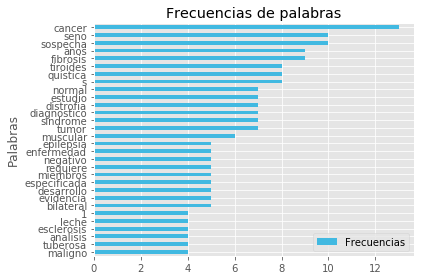

In [123]:
plot = frecuencias.plot(kind="barh", title = 'Frecuencias de palabras' , color = [('#41b9e1')]);
fig = plot.get_figure();
fig.savefig("frecuecias.png", bbox_inches=0)